<a href="https://colab.research.google.com/github/saikiran2508/FOOD_VISION-USING-CNN/blob/master/FOOD_VISION_USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FOOD VISION USING CNN

##Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-12-22 12:58:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.0MB/s    in 5.4s    

2022-12-22 12:58:52 (19.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

#walk through Pizza_steak

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} dir and {len(filenames)} images in '{dirpath}'.")

There are 2 dir and 0 images in 'pizza_steak'.
There are 2 dir and 0 images in 'pizza_steak/test'.
There are 0 dir and 250 images in 'pizza_steak/test/steak'.
There are 0 dir and 250 images in 'pizza_steak/test/pizza'.
There are 2 dir and 0 images in 'pizza_steak/train'.
There are 0 dir and 750 images in 'pizza_steak/train/steak'.
There are 0 dir and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Get the calss names

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [7]:
# Let's visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  taget_folder = target_dir+"/"+target_class

  random_image = random.sample(os.listdir(taget_folder),1)
  print(random_image)

  img = mpimg.imread(taget_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {img.shape}")

  return img

['3862243.jpg']
Image Shape: (512, 512, 3)


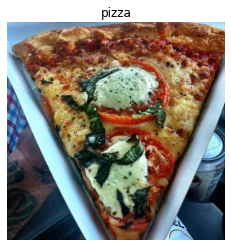

In [8]:
# View Random image

img = view_random_image("pizza_steak/train","pizza")

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[155, 198, 240],
        [156, 199, 241],
        [154, 199, 241],
        ...,
        [155, 196, 228],
        [153, 194, 226],
        [150, 191, 223]],

       [[152, 195, 237],
        [152, 197, 238],
        [152, 197, 239],
        ...,
        [155, 204, 234],
        [152, 201, 231],
        [149, 198, 228]],

       [[149, 194, 235],
        [150, 195, 236],
        [150, 195, 237],
        ...,
        [154, 214, 240],
        [152, 212, 240],
        [150, 210, 238]],

       ...,

       [[ 17,  17,  17],
        [ 44,  44,  42],
        [ 29,  28,  26],
        ...,
        [  5,  14,  29],
        [  0,   8,  23],
        [  5,  13,  26]],

       [[ 18,  17,  15],
        [ 25,  24,  22],
        [ 24,  23,  21],
        ...,
        [  8,  17,  32],
        [  8,  17,  32],
        [  4,  11,  27]],

       [[ 41,  40,  38],
        [ 17,  16,  14],
        [ 37,  36,  34],
        ...,
        [ 14,  23,  3

In [10]:
img.shape

(512, 512, 3)

In [11]:
# Get all the pixel values bwt 0 and 1
img/255.

array([[[0.60784314, 0.77647059, 0.94117647],
        [0.61176471, 0.78039216, 0.94509804],
        [0.60392157, 0.78039216, 0.94509804],
        ...,
        [0.60784314, 0.76862745, 0.89411765],
        [0.6       , 0.76078431, 0.88627451],
        [0.58823529, 0.74901961, 0.8745098 ]],

       [[0.59607843, 0.76470588, 0.92941176],
        [0.59607843, 0.77254902, 0.93333333],
        [0.59607843, 0.77254902, 0.9372549 ],
        ...,
        [0.60784314, 0.8       , 0.91764706],
        [0.59607843, 0.78823529, 0.90588235],
        [0.58431373, 0.77647059, 0.89411765]],

       [[0.58431373, 0.76078431, 0.92156863],
        [0.58823529, 0.76470588, 0.9254902 ],
        [0.58823529, 0.76470588, 0.92941176],
        ...,
        [0.60392157, 0.83921569, 0.94117647],
        [0.59607843, 0.83137255, 0.94117647],
        [0.58823529, 0.82352941, 0.93333333]],

       ...,

       [[0.06666667, 0.06666667, 0.06666667],
        [0.17254902, 0.17254902, 0.16470588],
        [0.11372549, 0

## An End-to-End CNN model

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Normalize
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

test_data = test_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

# Build a CNN model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 10s 198ms/step - loss: 0.6225 - accuracy: 0.6593 - val_loss: 0.4831 - val_accuracy: 0.8040
Epoch 2/10
47/47 [==============================] - 10s 210ms/step - loss: 0.4971 - accuracy: 0.7747 - val_loss: 0.4055 - val_accuracy: 0.8100
Epoch 3/10
47/47 [==============================] - 9s 192ms/step - loss: 0.4425 - accuracy: 0.8067 - val_loss: 0.3637 - val_accuracy: 0.8620
Epoch 4/10
47/47 [==============================] - 10s 217ms/step - loss: 0.4146 - accuracy: 0.8313 - val_loss: 0.3634 - val_accuracy: 0.8580
Epoch 5/10
47/47 [==============================] - 9s 188ms/step - loss: 0.3822 - accuracy: 0.8367 - val_loss: 0.3906 - val_accuracy: 0.8180
Epoch 6/10
47/47 [==============================] - 9s 188ms/step - loss: 0.3766 - accuracy: 0.8360 - val_loss: 0.3303 - val_accuracy: 0.8600
Epoch 7/10
47/47 [==============================] - 9s 187ms/s

In [14]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

### Ploting Loss Curves

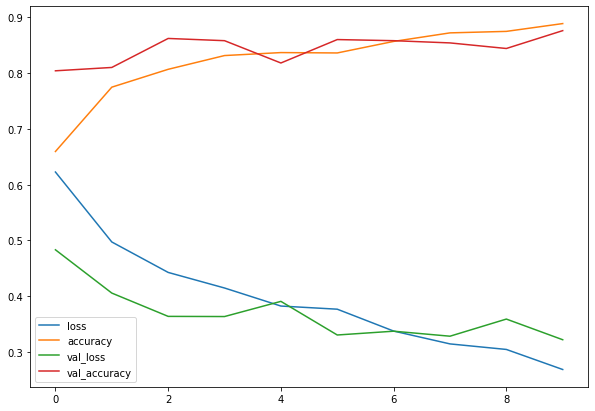

In [39]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [40]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

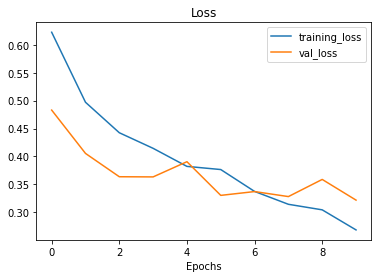

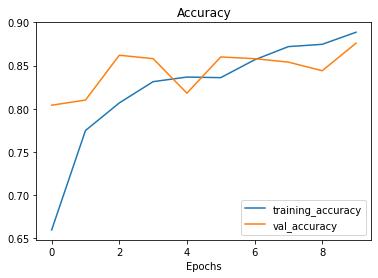

In [41]:
# Check out the loss curves of model_1
plot_loss_curves(history_1)

## Making a prediction with our custom data

In [15]:
print(class_names)

['pizza' 'steak']


--2022-12-22 13:03:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2022-12-22 13:03:17 (249 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

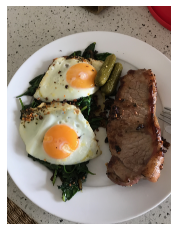

In [16]:
# View an example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [17]:
steak.shape

(4032, 3024, 3)

In [18]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [19]:
# Create a function to import and image and reshape it
def load_and_prep_image(filename,img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image
  img=img/255.
  return img

In [20]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [21]:
expand_steak = tf.expand_dims(steak,axis=0)

In [22]:
pred = model_1.predict(expand_steak)
pred

1/1 [==============================] - 0s 243ms/step


array([[0.7000349]], dtype=float32)

In [23]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [24]:
int(tf.round(pred)) ,tf.round(pred),class_names[1]

(1,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>,
 'steak')

In [25]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [26]:
def pred_and_plot(model,filename,class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [28]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread("03-pizza-dad.jpeg")

--2022-12-22 13:03:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-12-22 13:03:51 (221 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



1/1 [==============================] - 0s 16ms/step


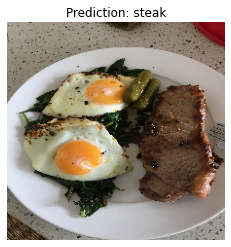

In [29]:
pred_and_plot(model_1,"03-steak.jpeg")

1/1 [==============================] - 0s 19ms/step


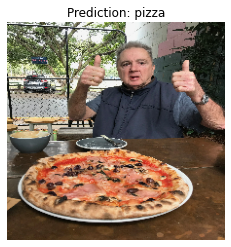

In [30]:
pred_and_plot(model_1,"03-pizza-dad.jpeg")

In [31]:
pizza = load_and_prep_image("03-pizza-dad.jpeg")

In [32]:
expand_pizza = tf.expand_dims(pizza,axis=0)

In [33]:
pred = model_1.predict(expand_pizza)
pred

1/1 [==============================] - 0s 17ms/step


array([[0.38351062]], dtype=float32)

### Save and load model

In [34]:
# save the model
model_1.save("saved_trained_model_10")

In [42]:
# Load the model
load_model_1 = tf.keras.models.load_model("saved_trained_model_10")
load_model_1.evaluate(test_data)

16/16 [==============================] - 2s 132ms/step - loss: 0.3150 - accuracy: 0.8700


[0.31496691703796387, 0.8700000047683716]